# Topic Modeling of News Groups

Adapted from [here](https://github.com/vatsan/text_analytics_on_mpp)

Let's next build a topic model (LDA - Latent Dirichlet Allocation) on the news groups posts from the  <i>demo.twenty_news_groups</i> table to uncover the underlying themes, in an unsupervised fashion. We'll then embed these posts in the topic space and build a classifier.
We'll use NLTK for tokenization.

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from IPython.display import Image
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

## Setup database connectivity


In [5]:
import pandas.io.sql as psql
import psycopg2
connect_credentials = {'database': 'postgres',
                       'host': 'localhost',
                       'password': '',
                       'user': 'postgres'}

# connect to postgres connection object
conn = psycopg2.connect(**connect_credentials)
conn.autocommit = True
schema_name = 'template'
psql.execute('SET search_path TO {}'.format(schema_name), conn)

%load_ext sql_magic
%config SQL.conn_name = 'conn'

The sql_magic extension is already loaded. To reload it, use:
  %reload_ext sql_magic


## Process data

In [6]:
!python process_20_newsgroups.py '20_newsgroups' '20_newsgroups_processed.tsv'

19997 documents written to 20_newsgroups_processed.tsv


## Load data and upload to db

In [7]:
df = pd.read_csv('20_newsgroups_processed.tsv', delimiter="\t", header=None)
df.columns = ['doc_id', 'contents', 'label']

# bytecode, utf-8 issue; this fixes it
# source: https://stackoverflow.com/questions/26541968/delete-every-non-utf-8-symbols-froms-string
df.contents = df.contents.str.decode('utf-8','ignore').str.encode("utf-8")

In [8]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://{user}:{password}@{host}:5432/{database}'.format(**connect_credentials))

# %read_sql CREATE SCHEMA demo;
df.to_sql('twenty_news_groups', engine, schema='demo', if_exists='replace', index=False)

# Analysis

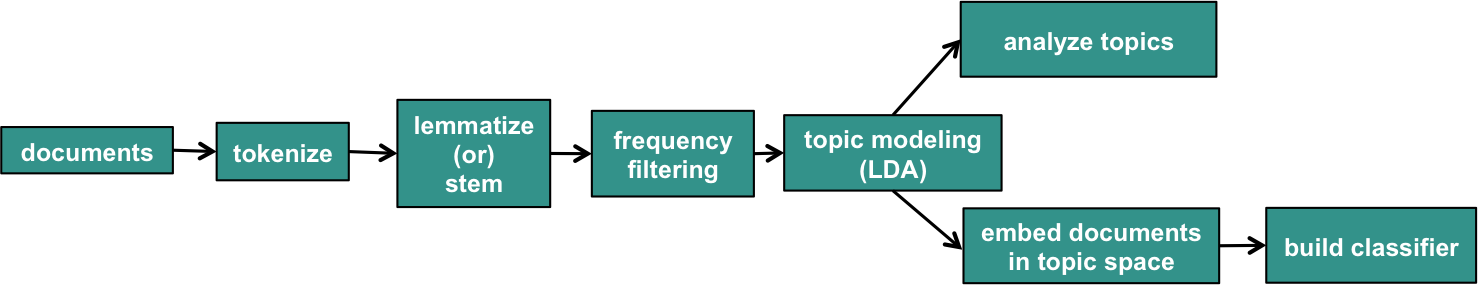

In [10]:
Image(filename='topic_analysis_pipeline.png')

In [11]:
%%read_sql df_head
select
    *
from
    demo.twenty_news_groups
limit 10;

Query started at 04:43:32 PM EDT; Query executed in 0.00 m

doc_id  \
0  0        
1  1        
2  2        
3  3        
4  4        
5  5        
6  6        
7  7        
8  8        
9  9        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
df